In [1]:
import SimpleITK as sitk
import matplotlib.pyplot as plt

In [2]:
img = sitk.ReadImage('3000158874 TOGNAZZI GIORGIO_ANP002393243 TAC TORACE_CT SAG STD.nii.gz')

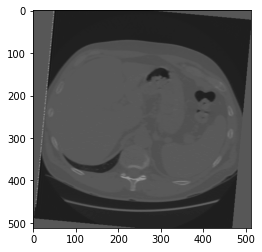

In [3]:
plt.imshow(sitk.GetArrayFromImage(img)[60,:,:], cmap='gray')

In [4]:
img_array = sitk.GetArrayFromImage(img)

In [5]:
img_array.max()

4222

In [6]:
img_array.min()

-2397

In [7]:
img_array.shape

(276, 512, 512)

In [169]:
img = sitk.GetImageFromArray(img_array)

In [121]:
sitk.WriteImage(img, '99016469_SX.nii.gz')

In [12]:
import numpy as np

In [123]:
np.argwhere(img_array==1)

array([[  0,  91, 279],
       [  0,  93, 207],
       [  0,  94, 202],
       ...,
       [240, 432, 262],
       [240, 433, 276],
       [240, 433, 336]])

In [124]:
from collections import Counter

In [125]:
unique, counts = np.unique(img_array, return_counts=True)

In [126]:
counts

array([1, 1, 1, ..., 1, 1, 1])

In [127]:
centre = np.array((250., 250., 60.))

In [10]:
def create_bin_sphere(arr_size, center, r):
    coords = np.ogrid[:arr_size[0], :arr_size[1], :arr_size[2]]
    distance = np.sqrt((coords[0] - center[0])**2 + (coords[1]-center[1])**2 + (coords[2]-center[2])**2) 
    return 1*(distance <= r)

In [9]:
arr_size = (276,511,511)
sphere_center = (135,250,250)
r=50
sphere = create_bin_sphere(arr_size,sphere_center, r)

#Plot the result


NameError: name 'create_bin_sphere' is not defined

In [156]:
img_sfera = img_array[sphere==1]

In [157]:
np.sum(img_sfera)

12485612

In [14]:
somma = []
for i in range(1,60):
    print(i)
    arr_size = (276,512,512)
    sphere_center = (135,250,250)
    r=i
    sphere = create_bin_sphere(arr_size,sphere_center, r)
    
    img_sfera = img_array[sphere==1]
    
    somma.append(np.sum(img_sfera))

    #Plot the result

    

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59


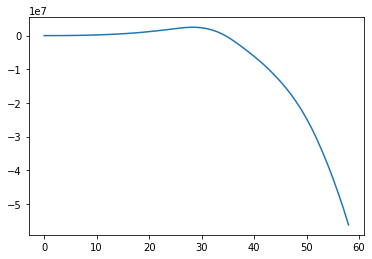

In [15]:
plt.figure()
plt.plot(somma)
plt.show()

In [54]:
img_finale =img_array[sphere_center[0]-30:sphere_center[0]+50, sphere_center[1]-130:sphere_center[1]+100, sphere_center[2]-130:sphere_center[2]+130]

In [55]:
img_finale[img_finale<-200]=-1024

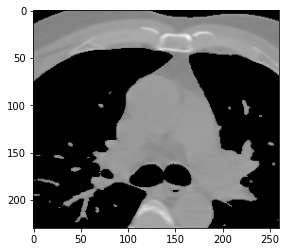

In [57]:
plt.imshow(img_finale[79,:,:],cmap='gray')